## HR Analytics: Job Change of Data Scientists
Predict who will move to a new job

Features

- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change


### Step 1. Library Import

In [1]:
import pandas as pd
import numpy as np

### Step 2. Data Load

In [2]:
train_data = pd.read_csv('../Datasets/aug_train.csv')
test_data = pd.read_csv('../Datasets/aug_test.csv')

In [3]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
# Check the null data in training set
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
# check the null data in test set
test_data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

### Step 3. EDA

In [8]:
train_data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [9]:
list(train_data.columns)

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [10]:
# just check the output
train_data[list(train_data.columns)[0]].dtype

dtype('int64')

In [11]:
# divide categorical columns and numerical columns
cat_col = []
num_col = []
for col in train_data.columns:
    if train_data[col].dtype == object:
        print('category coloumn : ',col)
        cat_col.append(col)
    else:
        print('numarical column : ',col)
        num_col.append(col)

numarical column :  enrollee_id
category coloumn :  city
numarical column :  city_development_index
category coloumn :  gender
category coloumn :  relevent_experience
category coloumn :  enrolled_university
category coloumn :  education_level
category coloumn :  major_discipline
category coloumn :  experience
category coloumn :  company_size
category coloumn :  company_type
category coloumn :  last_new_job
numarical column :  training_hours
numarical column :  target


In [12]:
# Check categorical Columns
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [13]:
# Check numerical Columns
num_col

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [14]:
# Check top 5 data
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [15]:
# Check data in 'categorical columns'
train_data[cat_col]

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


### Step 3-1. EDA - Visualization | Numerical Columns

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

#### Visualization the Correlation - Target & Numerical Columns

In [17]:
num_col

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [18]:
train_data['target'].unique()

array([1., 0.])

In [19]:
train_data[num_col]

,enrollee_id,city_development_index,training_hours,target
0,8949,0.920,36,1.0
1,29725,0.776,47,0.0
2,11561,0.624,83,0.0
3,33241,0.789,52,1.0
4,666,0.767,8,0.0
...,...,...,...,...
19153,7386,0.878,42,1.0
19154,31398,0.920,52,1.0
19155,24576,0.920,44,0.0
19156,5756,0.802,97,0.0


#### target is 0 or 1

In [20]:
# Check the correlation
train_data[num_col].corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


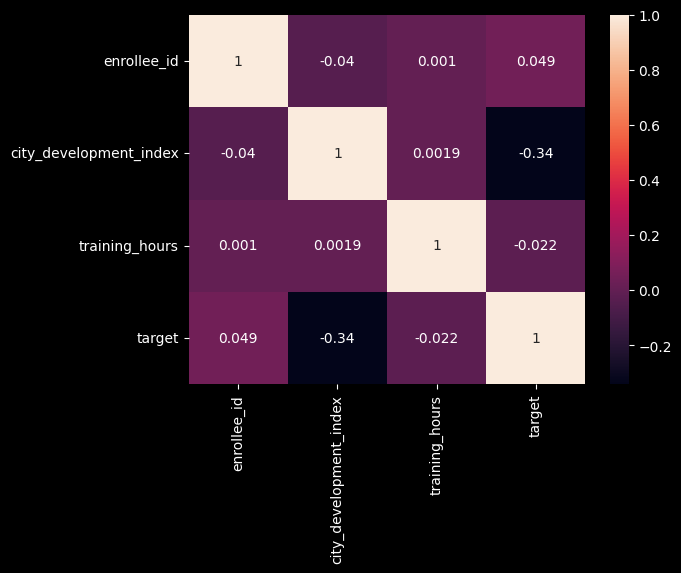

In [21]:
sns.heatmap(train_data[num_col].corr(), annot=True);

In [22]:
train_data[num_col].corr()['target']

enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
Name: target, dtype: float64

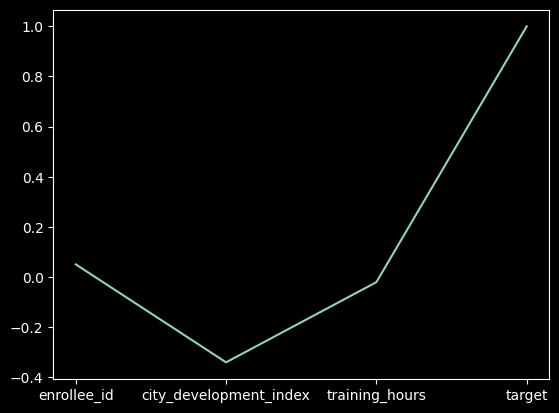

In [23]:
plt.plot(train_data[num_col].corr()['target'])

#### city_development_index has strong negative correlation, It's meaningful feature.

/Users/mac/Documents/GitHub/HRAnalyticsJobChangeDataScientists/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


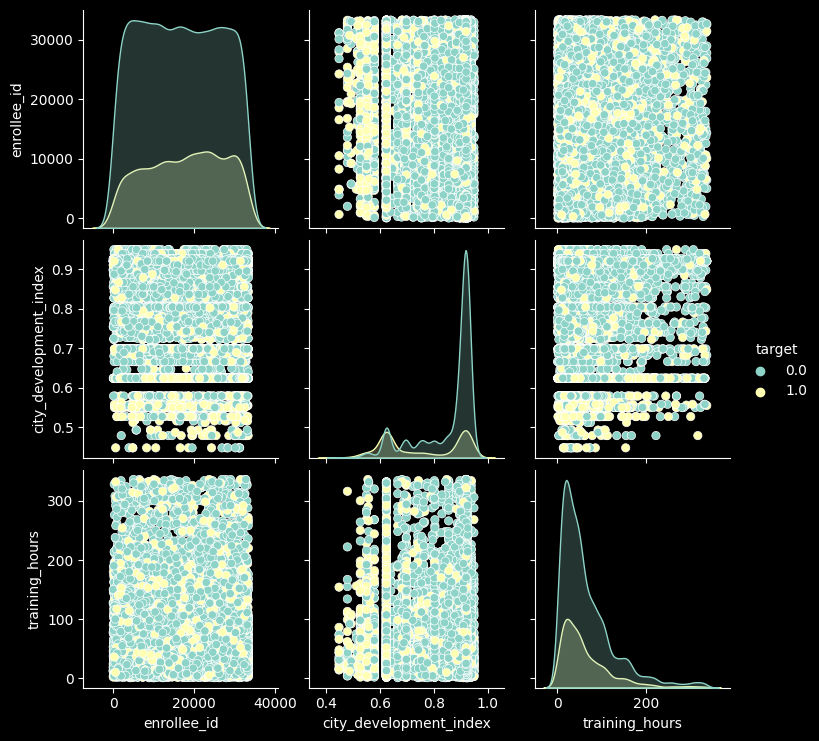

In [24]:
sns.pairplot(train_data[num_col], hue='target')

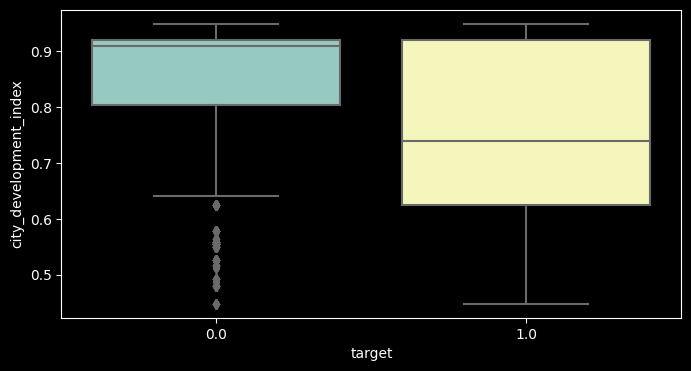

In [25]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='city_development_index', data=train_data);

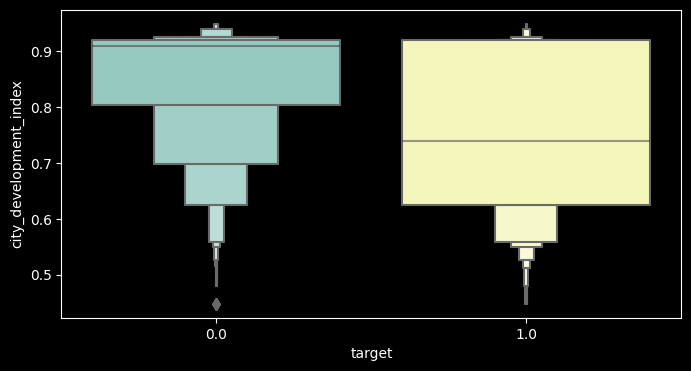

In [26]:
# boxenplot 
fig = plt.figure(figsize=(8,4))
sns.boxenplot(x='target', y='city_development_index', data=train_data);

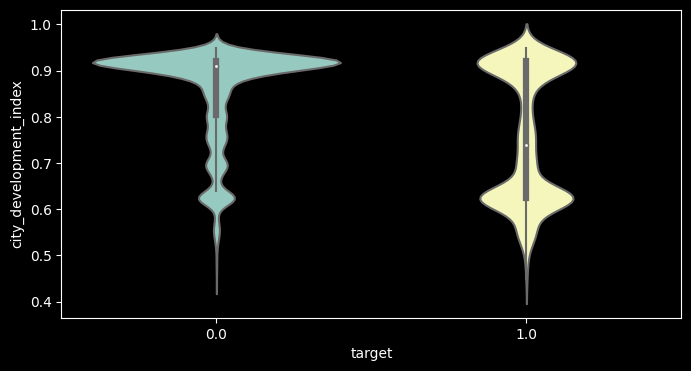

In [27]:
# show viloin plot
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='target', y='city_development_index', data=train_data);

#### Companies in more developed cities have lower turnover rates.

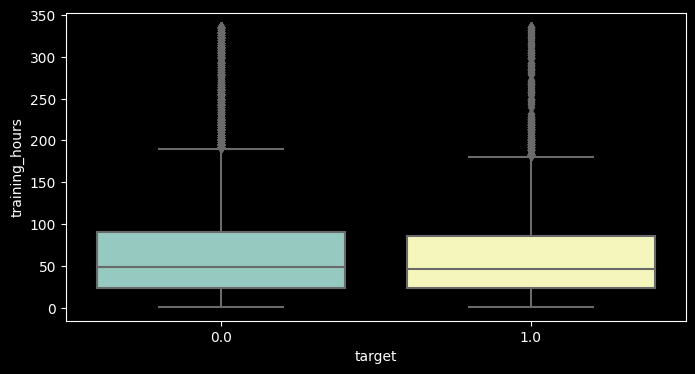

In [28]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='training_hours', data=train_data);

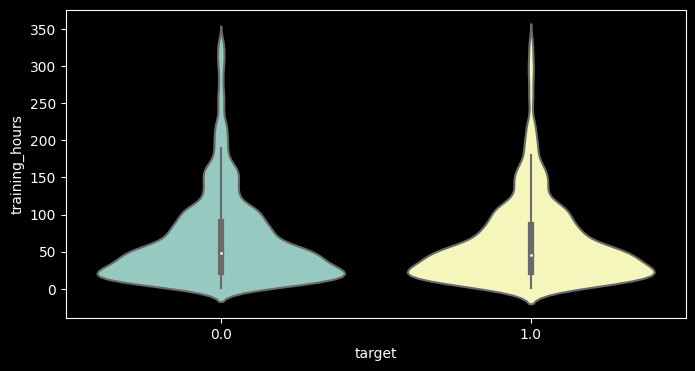

In [29]:
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='target', y='training_hours', data=train_data);

#### Although it was confirmed through the heatmap, training_hours (retraining) did not show a significant correlation with the turnover rate.

### Step 3-2. EDA - Visualization | Categorical Columns

In [30]:
train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


First, let's look at the city_development_index, which had high correlation (negative) in the numeric column.

In [31]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

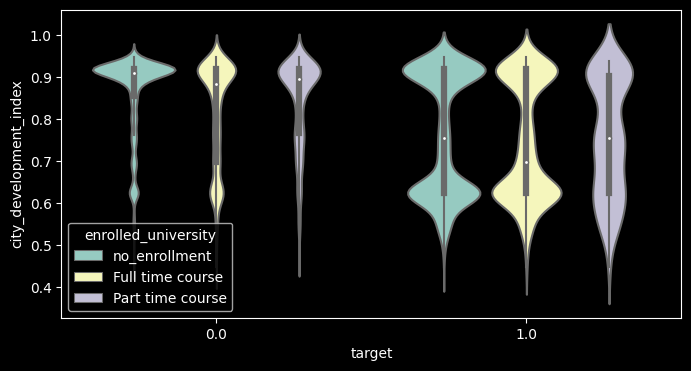

In [32]:
# enrolled_university
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='target', y='city_development_index', data=train_data, hue='enrolled_university');

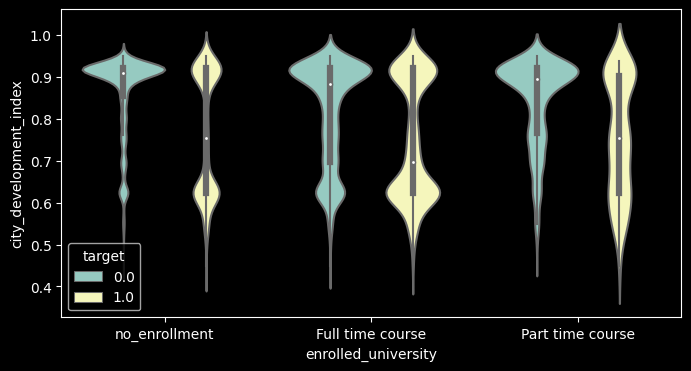

In [33]:
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='enrolled_university', y='city_development_index', data=train_data, hue='target');

#### I don't think the current approach is appropriate. Let's change it to a countplot.

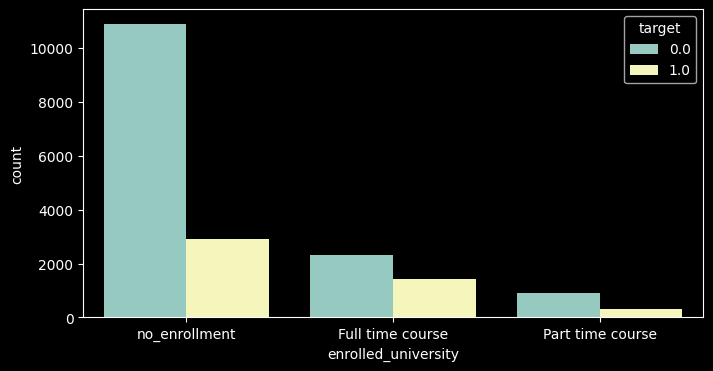

In [34]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='enrolled_university', data=train_data, hue='target');

#### It can be seen that the turnover rate for those with a seemingly high school diploma is relatively low. Let’s check the numbers accurately.

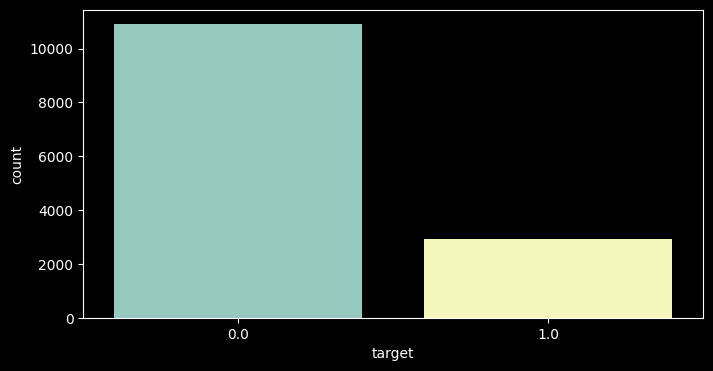

In [35]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='target', data=train_data[train_data['enrolled_university']=='no_enrollment']);

In [36]:
train_data[train_data['enrolled_university'] == 'no_enrollment'].describe()

,enrollee_id,city_development_index,training_hours,target
count,13817.000000,13817.000000,13817.000000,13817.000000
mean,16644.602229,0.842107,65.362018,0.211406
std,9674.592803,0.117346,59.617408,0.408321
min,1.000000,0.448000,1.000000,0.000000
25%,8230.000000,0.776000,23.000000,0.000000
50%,16662.000000,0.910000,48.000000,0.000000
75%,25049.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [37]:
train_data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [38]:
train_data[train_data['enrolled_university'] == 'Full time course'].describe()

,enrollee_id,city_development_index,training_hours,target
count,3757.000000,3757.000000,3757.000000,3757.000000
mean,17387.229172,0.788633,64.532340,0.380889
std,9444.223894,0.134233,60.069682,0.485670
min,7.000000,0.448000,1.000000,0.000000
25%,9338.000000,0.624000,23.000000,0.000000
50%,17681.000000,0.843000,46.000000,0.000000
75%,25276.000000,0.920000,87.000000,1.000000
max,33370.000000,0.949000,336.000000,1.000000


In [39]:
train_data[train_data['enrolled_university'] == 'Part time course'].describe()

,enrollee_id,city_development_index,training_hours,target
count,1198.000000,1198.000000,1198.000000,1198.000000
mean,17628.087646,0.819777,67.571786,0.252087
std,9644.413270,0.120055,65.065184,0.434392
min,11.000000,0.448000,1.000000,0.000000
25%,9261.250000,0.743500,22.250000,0.000000
50%,17403.000000,0.887000,47.000000,0.000000
75%,26395.250000,0.920000,90.000000,1.000000
max,33349.000000,0.949000,336.000000,1.000000


In [40]:
#High school graduates have the lowest turnover rate, followed by Full time> Part time> no_Enrollment
train_data[train_data['enrolled_university'] == 'no_enrollment'].describe()['target']['mean']

0.21140623869146705

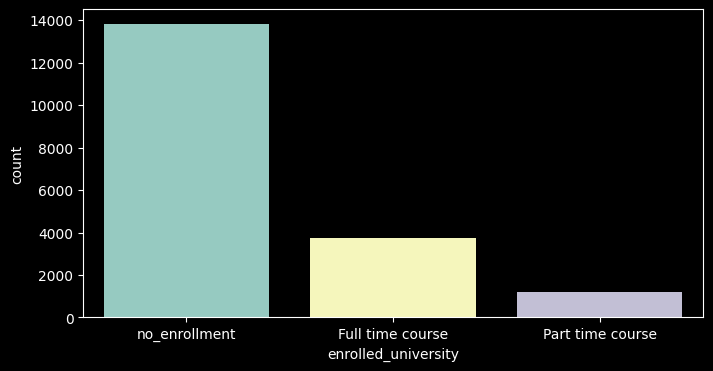

In [41]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='enrolled_university', data=train_data);

In [42]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

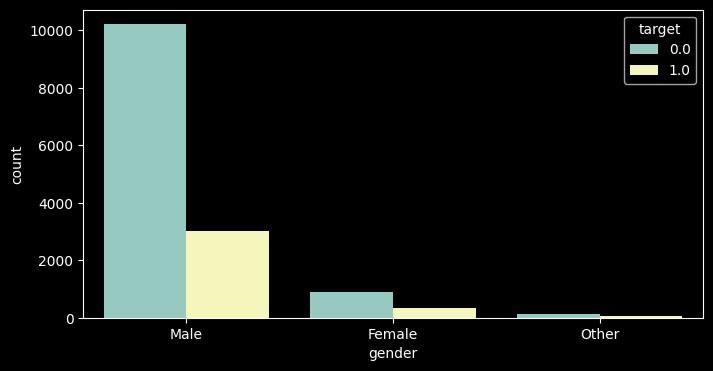

In [43]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=train_data, hue='target');

#### Inadequate contrast because the proportion of men is too large

In [44]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

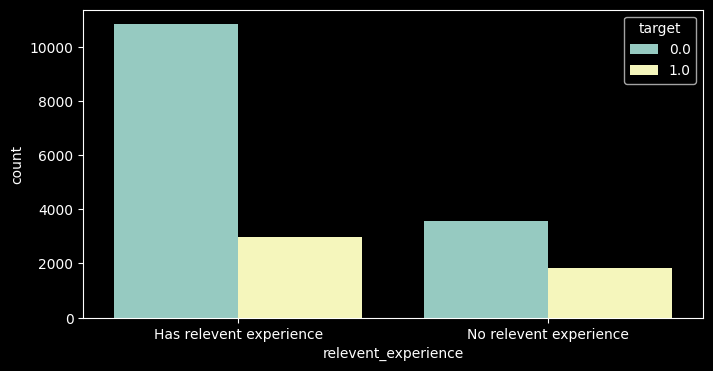

In [45]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='relevent_experience', data=train_data, hue='target');

#### If the resume has relevant experience in this job, the turnover rate is low (the higher the expertise, the lower the turnover rate).

In [46]:
train_data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

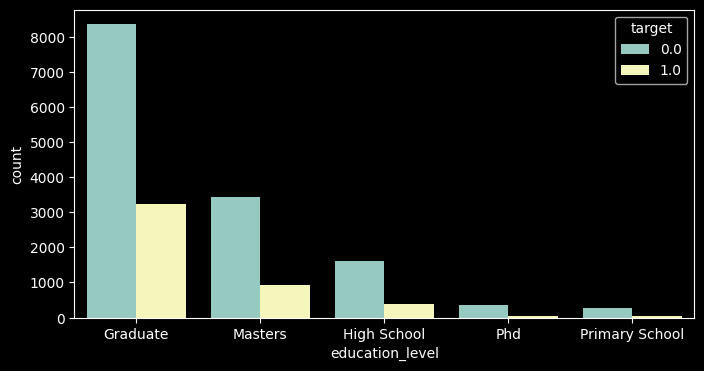

In [47]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='education_level', data=train_data, hue='target');

In [48]:
train_data[train_data['education_level'] == 'Graduate'].describe()

,enrollee_id,city_development_index,training_hours,target
count,11598.000000,11598.000000,11598.000000,11598.000000
mean,17042.915330,0.823731,65.773409,0.279790
std,9739.115384,0.127304,60.522653,0.448915
min,8.000000,0.448000,1.000000,0.000000
25%,8575.250000,0.698000,23.000000,0.000000
50%,17231.500000,0.910000,47.000000,0.000000
75%,25691.750000,0.920000,89.000000,1.000000
max,33380.000000,0.949000,336.000000,1.000000


In [49]:
train_data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [50]:
levels = list(train_data['education_level'].unique())

In [51]:
for level in levels:
    print(level, " --> ", train_data[train_data['education_level'] == level]['target'].mean())

Graduate  -->  0.2797896188998103
Masters  -->  0.21440036688832836
High School  -->  0.19533961328705998
nan  -->  nan
Phd  -->  0.14009661835748793
Primary School  -->  0.1331168831168831


[turnover rate]
- Primary School : 13%
- High School : 19%
- Graduate : 27%
- Masters : 21%
- Phd : 14%

General college graduates have a higher turnover rate than those with very low or very high levels of education.
It seems that there is a high proportion of worries about choosing a job. However, it has to be used only as a reference indicator because the percentage of college graduates is too high.

In [52]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

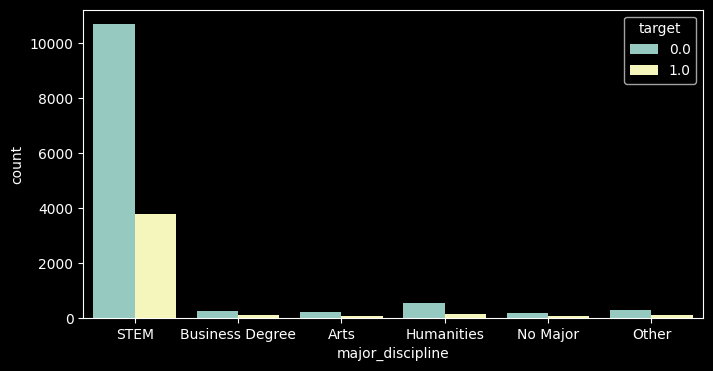

In [53]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='major_discipline', data=train_data, hue='target');

In [54]:
majors = list(train_data['major_discipline'].unique())

In [55]:
for major in majors:
    print(major, " --> ", train_data[train_data['major_discipline'] == major]['target'].mean())

STEM  -->  0.2615926028153464
Business Degree  -->  0.26299694189602446
nan  -->  nan
Arts  -->  0.20948616600790515
Humanities  -->  0.21076233183856502
No Major  -->  0.24663677130044842
Other  -->  0.2677165354330709


#### There is no significant difference in the turnover rate depending on the major.

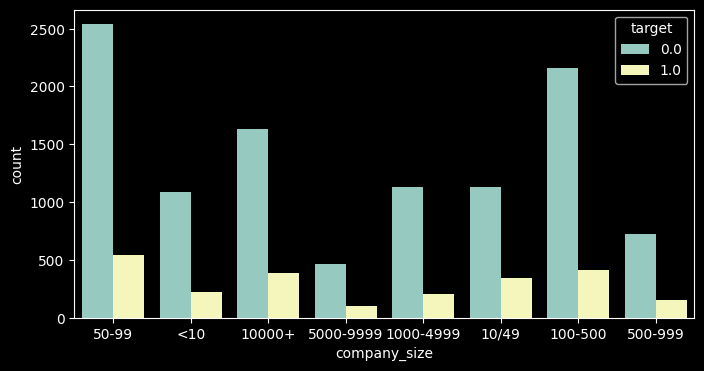

In [56]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='company_size', data=train_data, hue='target');

In [57]:
sizes = list(train_data['company_size'].unique())

In [58]:
for size in sizes:
    print(size, " --> ", train_data[train_data['company_size'] == size]['target'].mean())

nan  -->  nan
50-99  -->  0.1767758676613688
<10  -->  0.1712538226299694
10000+  -->  0.1906884596334819
5000-9999  -->  0.1811722912966252
1000-4999  -->  0.15060240963855423
10/49  -->  0.23385452073419444
100-500  -->  0.161415791520809
500-999  -->  0.1733181299885975


#### The size of the company also did not significantly affect the turnover rate.

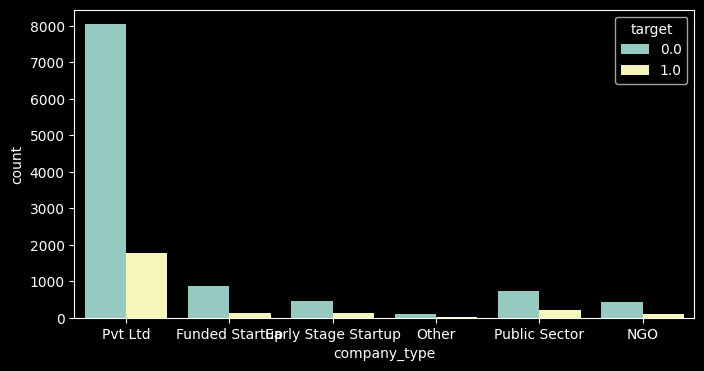

In [59]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='company_type', data=train_data, hue='target');

In [60]:
types = list(train_data['company_type'].unique())

In [61]:
for type_one in types:
    print(type_one, " --> ", train_data[train_data['company_type'] == type_one]['target'].mean())

nan  -->  nan
Pvt Ltd  -->  0.18080880105938676
Funded Startup  -->  0.13986013986013987
Early Stage Startup  -->  0.23548922056384744
Other  -->  0.2396694214876033
Public Sector  -->  0.2198952879581152
NGO  -->  0.18618042226487524


Early start-ups have the highest turnover rate, and funded start-ups have the lowest turnover rate. And Also, It can be used As a reference indicator only.

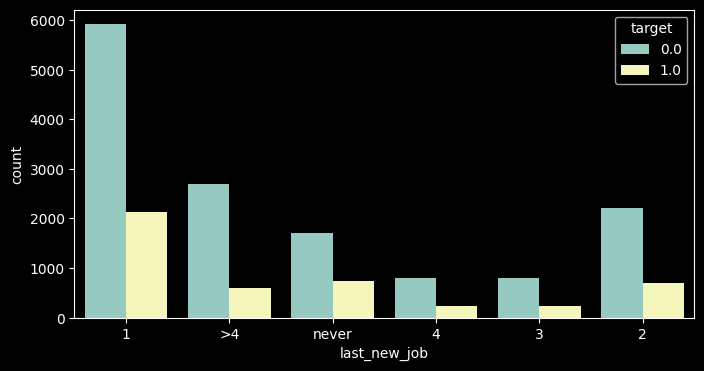

In [62]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='last_new_job', data=train_data, hue='target');

In [63]:
years = list(train_data['last_new_job'].unique())
for year in years:
    print(year, " --> ", train_data[train_data['last_new_job'] == year]['target'].mean())

1  -->  0.26430348258706465
>4  -->  0.182370820668693
never  -->  0.30138662316476345
4  -->  0.22157434402332363
3  -->  0.2255859375
2  -->  0.2413793103448276
nan  -->  nan


#### If the number of years of previous employment is very high (4 years or more), the turnover rate is low, and if there is no work experience (if it is the first job), the turnover rate is high.

In [64]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Step 4. Feature Engineering - drop Null

In [65]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [66]:
train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [67]:
train_data_dropna = train_data.dropna()


In [68]:
test_data_dropna = test_data.dropna()

In [69]:
train_data_dropna

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [70]:
for col in cat_col:
    train_data_dropna = pd.concat([train_data_dropna, pd.get_dummies(train_data_dropna[col])], axis=1)
    del(train_data_dropna[col])

In [71]:
train_data_dropna

,enrollee_id,city_development_index,training_hours,target,city_1,city_10,city_100,city_101,city_102,city_103,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
1,29725,0.776,47,0.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,666,0.767,8,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,402,0.762,18,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8,27107,0.920,46,1.0,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
11,23853,0.920,108,0.0,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,0.624,52,1.0,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
19149,251,0.920,36,1.0,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
19150,32313,0.920,23,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
19152,29754,0.920,25,0.0,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [72]:
for col in cat_col:
    test_data_dropna = pd.concat([test_data_dropna, pd.get_dummies(test_data_dropna[col])], axis=1)
    del(test_data_dropna[col])

In [73]:
test_data_dropna

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
3,27385,0.827,39,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,27724,0.920,72,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
11,9272,0.698,51,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
12,14249,0.762,48,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
16,7865,0.624,4,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,10726,0.884,16,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2115,13833,0.624,8,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2117,21500,0.725,160,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2121,27163,0.878,58,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [74]:
del_col = []
for col in list(train_data_dropna.columns):
    if col not in list(test_data_dropna.columns):
        print(col)
        if col != 'target':
            del_col.append(col)

target
city_1
city_106
city_107
city_109
city_117
city_120
city_126
city_127
city_129
city_131
city_144
city_145
city_146
city_155
city_166
city_18
city_2
city_26
city_33
city_37
city_48
city_53
city_55
city_59
city_62
city_7
city_78
city_81


In [75]:
del_col

['city_1',
 'city_106',
 'city_107',
 'city_109',
 'city_117',
 'city_120',
 'city_126',
 'city_127',
 'city_129',
 'city_131',
 'city_144',
 'city_145',
 'city_146',
 'city_155',
 'city_166',
 'city_18',
 'city_2',
 'city_26',
 'city_33',
 'city_37',
 'city_48',
 'city_53',
 'city_55',
 'city_59',
 'city_62',
 'city_7',
 'city_78',
 'city_81']

In [76]:
for col in del_col:
    del(train_data_dropna[col])

In [77]:
train_data_dropna

,enrollee_id,city_development_index,training_hours,target,city_10,city_100,city_101,city_102,city_103,city_104,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
1,29725,0.776,47,0.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,666,0.767,8,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,402,0.762,18,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8,27107,0.920,46,1.0,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
11,23853,0.920,108,0.0,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,0.624,52,1.0,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
19149,251,0.920,36,1.0,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
19150,32313,0.920,23,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
19152,29754,0.920,25,0.0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [78]:
test_data_dropna

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
3,27385,0.827,39,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,27724,0.920,72,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
11,9272,0.698,51,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
12,14249,0.762,48,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
16,7865,0.624,4,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,10726,0.884,16,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2115,13833,0.624,8,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2117,21500,0.725,160,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2121,27163,0.878,58,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [79]:
train_data_dropna.isnull().sum().sum()

0

In [80]:
test_data_dropna.isnull().sum().sum()

0

#### All the null values are dropped.

### Step 4. Split Train and Validation Set

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
y = train_data_dropna['target']

In [83]:
X = train_data_dropna.drop('target',axis=1)

In [84]:
X

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
1,29725,0.776,47,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,666,0.767,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,402,0.762,18,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8,27107,0.920,46,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
11,23853,0.920,108,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,0.624,52,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
19149,251,0.920,36,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
19150,32313,0.920,23,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
19152,29754,0.920,25,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=1, test_size=0.3)

In [86]:
X_train

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
15590,7729,0.624,42,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
18064,2845,0.804,45,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
18357,22109,0.624,68,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9063,1394,0.895,22,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4653,19206,0.920,15,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,27528,0.920,8,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
16712,7549,0.920,14,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1916,3742,0.920,47,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
11019,154,0.754,31,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [87]:
X_valid

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
13337,28933,0.624,156,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
10598,5761,0.896,109,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
596,15259,0.920,46,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
19047,10182,0.920,60,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
15395,23100,0.920,2,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6194,54,0.754,34,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
8334,28256,0.924,28,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
8069,11375,0.920,50,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
76,22683,0.893,65,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [88]:
y_train

15590    0.0
18064    0.0
18357    1.0
9063     0.0
4653     0.0
        ... 
6041     0.0
16712    0.0
1916     0.0
11019    0.0
492      1.0
Name: target, Length: 6268, dtype: float64

In [89]:
y_valid

13337    0.0
10598    0.0
596      0.0
19047    0.0
15395    0.0
        ... 
6194     0.0
8334     0.0
8069     0.0
76       0.0
13039    1.0
Name: target, Length: 2687, dtype: float64

### Step 5. Model Creation and Training

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [91]:
model.fit(X_train,y_train)

LogisticRegression()

In [92]:
predictions = model.predict(X_valid)

In [93]:
predictions

array([1., 0., 0., ..., 0., 0., 0.])

### Step 6. Measurement of Validation data Accuracy

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(predictions, y_valid)

0.8548567175288426